# Auswertung

In [1]:
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import os


%matplotlib inline

## Load Data

In [2]:
data_dict={}
for filename in os.listdir('./Cities/'):
    city = filename.split('.')[0]
    data_dict[city]=pd.read_feather('./Cities/%s.feather' % city)
    data_dict[city].drop(labels='index', axis=1, inplace=True)

## Versuche mit der Höhe

In [3]:
data_dict['Graz'][data_dict['Graz']['Linie']=='Tram 1: Eggenberg/UKH => Mariatrost']

,Linie,Nummer,Distanz,x,y,Latitude,Longitude,d_Kurvigkeit,Kurvigkeit,Krümmung,Höhe
7668,Tram 1: Eggenberg/UKH => Mariatrost,1,0.000000,0.000000,0.000000,47.079058,15.396538,0.000000,0.000000,0.000000,379
7669,Tram 1: Eggenberg/UKH => Mariatrost,1,4.087957,-4.103160,0.477359,47.079048,15.396590,1.603024,0.000000,0.007600,379
7670,Tram 1: Eggenberg/UKH => Mariatrost,1,6.557091,-6.587952,0.703195,47.079043,15.396622,8.162819,1.603024,0.047034,379
7671,Tram 1: Eggenberg/UKH => Mariatrost,1,9.479874,-9.539306,0.592223,47.079040,15.396660,8.437256,9.765844,0.036642,379
7672,Tram 1: Eggenberg/UKH => Mariatrost,1,13.710175,-13.752276,-0.131460,47.079040,15.396716,11.742656,18.203100,0.053053,379
...,...,...,...,...,...,...,...,...,...,...,...
8599,Tram 1: Eggenberg/UKH => Mariatrost,1,11269.664049,-6536.699686,-3917.230723,47.104196,15.488786,-1.508910,3154.951274,-0.002265,422
8600,Tram 1: Eggenberg/UKH => Mariatrost,1,11280.054635,-6540.455423,-3927.037284,47.104276,15.488855,-0.041455,3156.460183,-0.000051,422
8601,Tram 1: Eggenberg/UKH => Mariatrost,1,11295.170447,-6545.928410,-3941.299920,47.104394,15.488955,-0.857218,3156.501639,-0.000903,422
8602,Tram 1: Eggenberg/UKH => Mariatrost,1,11309.577198,-6551.327228,-3954.822049,47.104505,15.489052,0.949637,3157.358857,0.000679,422


Glättung mit einem Savitzky-Golay-Filter

<Axes: xlabel='Distanz', ylabel='Höhe'>

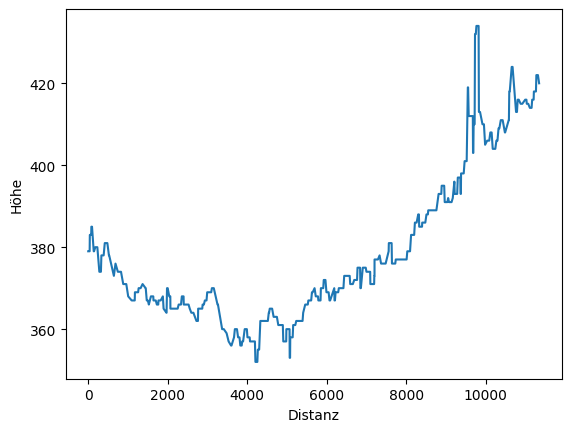

In [4]:
#h_savgol=scipy.signal.savgol_filter(data['Graz'][data['Graz']['Linie']=='Tram 1: Eggenberg/UKH => Mariatrost']['Höhe'],22,1)
sns.lineplot(data_dict['Graz'][data_dict['Graz']['Linie']=='Tram 1: Eggenberg/UKH => Mariatrost'], x='Distanz', y='Höhe', hue= 'Linie', legend=False)

Überlagerung der Höhe und der Krümmung führt zu __nix__.

<Axes: xlabel='Distanz', ylabel='Krümmung'>

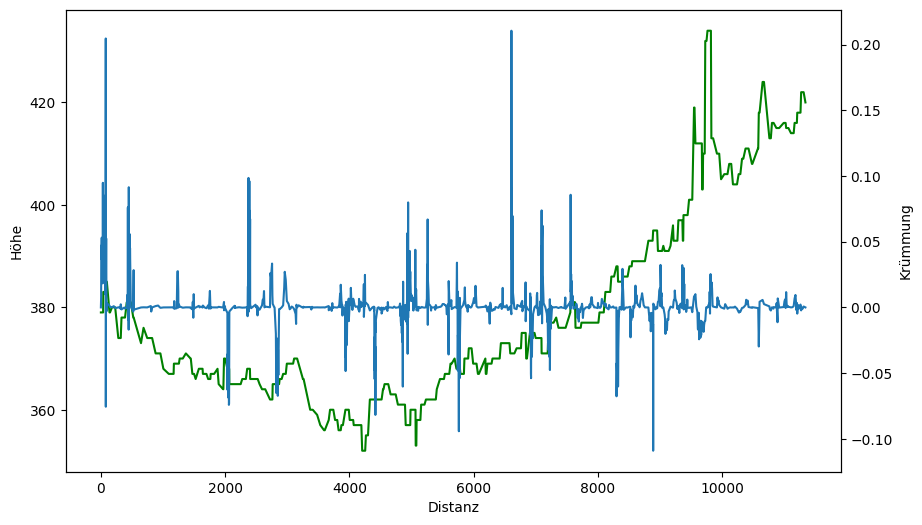

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data= data_dict['Graz'][data_dict['Graz']['Linie']=='Tram 1: Eggenberg/UKH => Mariatrost'], x='Distanz', y= 'Höhe', color='green')
ax = ax1.twinx()
sns.lineplot(data= data_dict['Graz'][data_dict['Graz']['Linie']=='Tram 1: Eggenberg/UKH => Mariatrost'], x='Distanz', y= 'Krümmung')

## Netzgrafik Zeichnen

In [6]:
data_dict['Wien']

,Linie,Nummer,Distanz,x,y,Latitude,Longitude,d_Kurvigkeit,Kurvigkeit,Krümmung,Höhe
0,Tram 71: Schottenring => Hauptwerkstätte,71,0.000000,0.000000,0.000000,48.216311,16.371765,0.000000,0.000000,0.000000,171
1,Tram 71: Schottenring => Hauptwerkstätte,71,12.773177,-9.308587,8.963849,48.216218,16.371867,1.975482,0.000000,0.004029,171
2,Tram 71: Schottenring => Hauptwerkstätte,71,15.222005,-11.145656,10.626171,48.216200,16.371887,6.280809,1.975482,0.043307,171
3,Tram 71: Schottenring => Hauptwerkstätte,71,17.274739,-12.815346,11.861157,48.216187,16.371906,8.040157,8.256292,0.053045,171
4,Tram 71: Schottenring => Hauptwerkstätte,71,19.925386,-15.155074,13.171594,48.216172,16.371933,7.642352,16.296449,0.045965,171
...,...,...,...,...,...,...,...,...,...,...,...
38726,"Tram 49: Ring, Volkstheater => Hütteldorf",49,8526.594105,7609.946855,1821.263802,48.202560,16.255782,-1.837095,1650.911708,-0.013173,215
38727,"Tram 49: Ring, Volkstheater => Hütteldorf",49,8528.921596,7609.177274,1819.038842,48.202578,16.255797,-9.571649,1652.748803,-0.064526,215
38728,"Tram 49: Ring, Volkstheater => Hütteldorf",49,8531.196901,7608.107642,1817.000994,48.202594,16.255816,-2.496125,1662.320452,-0.012046,215
38729,"Tram 49: Ring, Volkstheater => Hütteldorf",49,8535.356872,7606.007472,1813.354691,48.202623,16.255852,-3.814609,1664.816577,-0.008112,216


<Axes: xlabel='Longitude', ylabel='Latitude'>

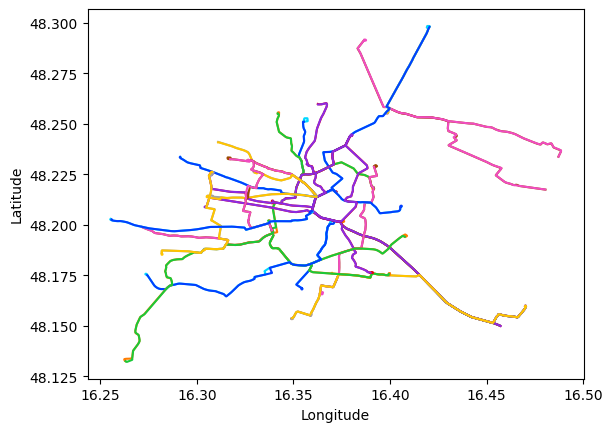

In [7]:
sns.lineplot(data= data_dict['Wien'], x='Longitude', y='Latitude', hue= 'Linie', legend=False, sort=False, palette='bright')

## Überprüfung der Daten in Portland
Hier sieht die Länge einer Linie komisch aus.

In [20]:
df_full[df_full['Distanz']==max(df_full['Distanz'])]

,index,Linie,Nummer,Distanz,x,y,Latitude,Longitude,d_Kurvigkeit,Kurvigkeit,Krümmung,Höhe,City
168050,7565,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,57313.476144,6.004688,-13.765216,45.498933,-122.791289,0.0,3635.081642,0.0,64.0,Portland


In [22]:
df_full[df_full['Linie']=='MAX Red Line: Hillsboro Airport/Fairgrounds => Portland International Airport']

,index,Linie,Nummer,Distanz,x,y,Latitude,Longitude,d_Kurvigkeit,Kurvigkeit,Krümmung,Höhe,City
166394,5909,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,0.000000,0.000000,0.000000,45.499036,-122.791232,0.000000,0.000000,0.000000,64.0,Portland
166395,5910,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,32.219245,-14.418555,36.398118,45.499303,-122.791070,-3.650967,0.000000,-0.001422,70.0,Portland
166396,5911,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,66.394828,-27.474500,75.819413,45.499578,-122.790875,-2.885122,3.650967,-0.001325,70.0,Portland
166397,5912,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,88.507557,-34.757887,101.682788,45.499752,-122.790738,-2.844872,6.536089,-0.001648,68.0,Portland
166398,5913,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,111.035665,-40.993598,128.337153,45.499925,-122.790587,-2.532335,9.380961,-0.001679,68.0,Portland
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168046,7561,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,57245.128924,46.350812,-86.317828,45.498341,-122.791525,-3.687919,3627.447382,-0.001611,64.0,Portland
168047,7562,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,57277.230041,26.630101,-52.663635,45.498621,-122.791423,-0.336144,3631.135301,-0.000198,64.0,Portland
168048,7563,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,57289.051795,19.433181,-40.231776,45.498723,-122.791385,-3.547324,3631.471445,-0.003780,64.0,Portland
168049,7564,MAX Red Line: Hillsboro Airport/Fairgrounds =>...,Red,57301.487732,12.602440,-26.752705,45.498830,-122.791336,0.062873,3635.018769,0.000067,64.0,Portland


<Axes: xlabel='Longitude', ylabel='Latitude'>

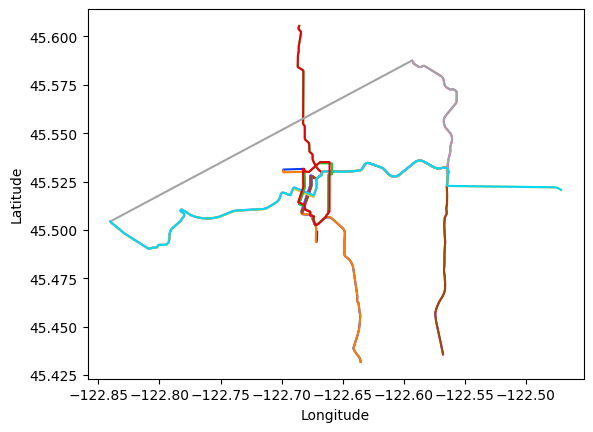

In [23]:
sns.lineplot(data= data_dict['Portland'], x='Longitude', y='Latitude', hue= 'Linie', legend=False, sort=False, palette='bright')

## Gesamtdatensatz
+ Zusammenführen der Daten
+ Errechnung der Radien
+ Reduktion auf Linien und Errechnung der Durchschnitte über die Linie

In [18]:
df_full = pd.DataFrame()
for city in data_dict:
    data_dict[city]['City']=city
    df_full = pd.concat(objs=[df_full, data_dict[city]])
df_full.reset_index(inplace=True)

In [24]:
#sns.lineplot(data=df_full, x='Distanz', y='Höhe', hue='Linie', legend=False)